# 0. Introduction

## Goal

This notebook aims to present how data stored in non formatted documents could be leveraged to improve data quality inside the PIM.

This notebook uses a handful of modules developped inside this project.

## What pipeline?

The different steps for this project are as follows:

1. fetch all product IDs from PIM with the associated ingredient lists
- split the products between a train set and a test set
- train the algorithm on the train set: i.e. construct the vocabulary
- make it make prediction on the test set
- compare it with the ingredient list on this product

# 1. Fetching the data

We will use production data for training and testing of this model. The ID of the products are the PIM uid, and therefore are listed in the directory of the PIM-API module.

First, let's get those uids.

In [1]:
from src import pimapi
requester = pimapi.Requester('prd')
requester.refresh_directory()
requester._directory

Done


,type,title,lastModified,lastRefreshed,lastFetchedData,lastFetchedFiles
uid,,,,,,
58f67e91-6d16-4f12-97c7-e67d24be6805,pomProduct,Curcuma moulu en sac 1 kg LA CASE AUX EPICES,2020-02-18 18:01:49.330000+00:00,2020-02-24 10:02:08.227698+00:00,2020-02-19 08:03:05.876549+00:00,2020-02-19 08:03:09.465260+00:00
f46327cf-8f3c-4b67-85fa-7e6e6daaf618,pomProduct,Pique à viande bleu en sachet de 100 HIPPOPOTAMUS,2020-01-06 14:52:29.288000+00:00,2020-02-24 10:02:08.227698+00:00,2020-02-03 13:22:18.211934+00:00,2020-02-03 13:22:48.460434+00:00
58a1ae66-ca4d-4d82-9d30-4073b1edaeb8,pomProduct,Pique à viande rouge en sachet de 100 HIPPOPOT...,2020-01-06 14:52:48.715000+00:00,2020-02-24 10:02:08.227698+00:00,2020-02-03 13:22:18.211934+00:00,2020-02-03 13:22:48.460434+00:00
9bc59474-7839-458b-b56a-ba334fe4894b,pomProduct,Pique à viande noir en sachet de 100 HIPPOPOTAMUS,2020-01-06 14:53:00.627000+00:00,2020-02-24 10:02:08.227698+00:00,2020-02-03 13:22:18.211934+00:00,2020-02-03 13:22:48.460434+00:00
c97834e7-124e-4491-9f2a-3e4009fdda4e,pomProduct,Pique à viande marron en sachet de 100 HIPPOPO...,2020-01-06 14:53:12.375000+00:00,2020-02-24 10:02:08.227698+00:00,2020-02-03 13:22:18.211934+00:00,2020-02-03 13:22:48.460434+00:00
...,...,...,...,...,...,...
7f51a13e-05a5-4497-9349-4219ae64f7fd,pomProduct,CELIOUATE 38X38 BETON OLYMPIA ANTHRACITE,2020-02-21 06:35:48.034000+00:00,2020-02-24 10:02:08.227698+00:00,2020-02-21 15:47:15.563212+00:00,2020-02-21 15:47:25.576650+00:00
4128f89a-8df7-4da7-a2c0-3ee1302a46f4,pomProduct,BARQUETTE PATE A TARTINER POULAIN,2020-02-21 13:02:31.662000+00:00,2020-02-24 10:02:08.227698+00:00,2020-02-21 15:47:15.563212+00:00,2020-02-21 15:47:25.576650+00:00
e770da68-157f-4fd2-a951-ffc63fa5f69e,pomProduct,MELANGE JAKARTA EN SAC 1KG,2020-02-21 10:46:27.812000+00:00,2020-02-24 10:02:08.227698+00:00,2020-02-21 15:47:15.563212+00:00,2020-02-21 15:47:25.576650+00:00


One can see the modification status of the product via the `modification_report` method:

In [2]:
requester.modification_report()

Number of items: 13001
Number of items with outdated data: 30
Number of items with outdated files: 30


Outdated products can be refreshed via the following:

In [3]:
requester.fetch_list_from_PIM(requester.modified_items(), batch_size=20)
requester.dump_data_from_result()
requester.dump_files_from_result()
requester.modification_report()

Done
Done
Launching 2 threads.
Thread complete!
Thread complete!
Done
Number of items: 13001
Number of items with outdated data: 1
Number of items with outdated files: 1


The PIM uids of the products are the keys of the `directory` of our requester. We extract the ingredients associated with these uids.

In [5]:
requester.fetch_all_from_PIM(page_size=1000, max_page=-1, nx_properties='*')
requester.result[0].json()['entries'][0]

Done


{'entity-type': 'document',
 'repository': 'default',
 'uid': 'e2128efe-08a3-4c93-a251-2f39eee7569b',
 'path': '/default-domain/pomSupplierWorkspace/CGMP/Set_de_table_extra_blanc_bord_festonne_en_colis_de_500_CGMP.1556352890062',
 'type': 'pomProduct',
 'state': 'product.waiting.supplier.validation',
 'parentRef': '0f182b14-e794-4a1a-af96-84d976ea9453',
 'isCheckedOut': False,
 'isVersion': False,
 'isProxy': False,
 'changeToken': '27-0',
 'isTrashed': False,
 'title': 'Set de table extra blanc bord festonné en colis de 500 CGMP',
 'lastModified': '2019-11-19T11:23:48.463Z',
 'properties': {'pprodc:withoutPalmOil': None,
  'pprodc:eggFarmingMode': None,
  'pprodc:milkAnimalOrigin': [],
  'pprodc:monoIngredient': False,
  'pprodc:activeIngredients': [],
  'pprodc:withoutCornStarch': None,
  'pprodc:withoutPhthalate': None,
  'pprodc:eggOrigin': [],
  'pprodc:withoutPolyphosphateAdded': None,
  'pprodc:withoutConservativeAgent': None,
  'pprodc:additives': [],
  'pprodc:withoutBisphenol

In [6]:
mapping = {'uid': 'uid', 'Libellé': 'title', 'Ingrédients': 'properties.pprodc:ingredientsList'}
df = requester.result_to_dataframe(record_path='entries', mapping=mapping, index='uid')
df

,Libellé,Ingrédients
uid,,
e2128efe-08a3-4c93-a251-2f39eee7569b,Set de table extra blanc bord festonné en coli...,None
34d33a48-5735-49ec-a08f-6642933dec00,Préparation de concentré de citron et d'aneth ...,Préparation aux jus de citron & aneth (condime...
d45d3058-f7d5-4cb8-be37-99bcc2ed06e9,Ecume de saveurs en bouteille 150 ml MISS ALGAE,Préparation de jus de yuzu ( condiment de bals...
10f34e62-6a90-4cdc-9960-43df5c661719,"Vin de France Merlot rouge 12,5° en bouteille ...",None
34c638ab-2fc8-4eba-a0b6-410b1340ae1c,Vin de France Cinsault rosé 12° en bouteille 7...,None
...,...,...
ee2a60ff-581f-4c7b-968b-5e7983b3c5ff,HARICOTS VERTS EXTRA FINS 4/4 EPISAVEURS,"haricots verts , eau, sel"
272c9c44-39a3-4391-bc3b-d40aad9e1c25,FLAGEOLETS EXTRA FINS 5/1,"flageolets verts, eau, sel"
e493062f-5aa6-48be-9fc8-d7b37235c466,BOITE BURGER KRAFT 145X130X80,None


# 2. Train / Test split

We will separate our data into a train test and a test set of equal sizes.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df, test_size=0.5, random_state=42)

In [8]:
print(len(X_train))
X_train.iloc[:10]

6494


,Libellé,Ingrédients
uid,,
136cebdb-2441-433f-be2d-806e912fb269,50 SERV R'SOFT BLANC LUNCH POCH 40X40 IMP 1C ...,None
68998d80-40c6-479a-b03e-b76ebc6546b9,Sauce au bacon fumé en flacon souple 875 ml HEINZ,"Ingrédients : Huile de soja (50%), eau, vinaig..."
d7215cd0-affa-4c3d-9604-08989e99e5a5,Sauce tomate à froid hyposodée en poche 1 kg N...,"Tomate 50 %, amidon modifié de pomme de terre,..."
4dc4aa51-4afa-4691-8f36-948d5af3d3c1,BOITE PÂTISSIÈRE EN CARTON BLANCHE 16 X 16 X 5...,None
c0621ad5-10f7-40b6-a59d-d5345f10a0cc,Grillettines briochées en paquet 255 g PASQUIER,"Farine de BLE, sucre, BEURRE concentré (10,9%)..."
4fe4af90-63f5-4e30-b3d8-bf0acbb8e318,"SEL DE DÉNEIGEMENT EN SAC 12,5 KG ESCO",None
3910a26d-d764-4915-a2f4-8abcf71e9d72,Pain au lait nature sachet 350 g 10 unités LA ...,"Farine de BLE, sucre, OEUFS frais, huile de co..."
923e0762-3e4e-4afa-a353-7f8e504fb771,DESCALER PLUS,None
a033f5e0-1b87-4af4-9619-cf66d2dd9cca,Fonds d'artichaut 30/40 en boîte 3/1 ARTIMOR,"Fonds d'artichauts, eau, sel, jus concentré de..."


In [9]:
print(len(X_test))
X_test.iloc[:10]

6494


,Libellé,Ingrédients
uid,,
e3b1cd27-7b2b-48fc-a610-635c2e661caa,Amande émondée en poudre en sachet 1 kg MARGUE...,AMANDES (100%)
da12f302-3d3a-439a-9000-a419dc5bea3e,Moelleux perles de sucre en étui 40 g KER CADELAC,"Farine de BLE, huile de colza, sucre, OEUFS en..."
68fb24b6-f901-4876-975c-3412661f3dc9,Couvercle pour bol à salade en sachet de 25 HU...,None
f4f77466-80c7-4987-a2bf-8ac47dd95abb,"Mini-tartelette carrée sucrée diam 3,8 cm HUG","Farine de FROMENT, graisse de palme non hydrog..."
90c02458-2109-4f3e-8803-4d5fff9e1dec,Serviette blanche en paquet de 60 GLOBAL HYGIENE,None
a3d6d8f5-a892-4888-a819-c2bdacd7858a,Moule en papier cuisson forme tulipe imprimé j...,None
5795ef7f-2160-4c8a-954e-71e6904eb44a,"Sel fin en dose 0,8 g LA CASE AUX EPICES","Sel, anti-agglomérant:E535"
02bfc037-13b7-4ca7-bb86-de2ae0f3780c,Oasis tropical en canette 33 cl OASIS,"Ingrédients : Eau de source 80%, jus de fruits..."
91cc841d-4a59-4951-b43f-9f1eb4a39104,"Bière blonde 5,5° en bouteille verre 25 cl 1664","Eau, malt d'ORGE, sirop de glucose, BLE, malt ..."


# 3. Constructing the vocabulary

We will now use bag-of-words related functionalities of scikit-learn to construct our vocabulary.

## 3.1 Removing `None` values

First step is to remove `None` values from ingredient lists to make our count of words.

In [10]:
import pandas as pd
print(f'None values before replacement in X_train: {sum(pd.isna(X_train["Ingrédients"]))}')
X_train.loc[:, 'Ingrédients'].fillna('', inplace=True)
print(f'None values after replacement in X_train: {sum(pd.isna(X_train["Ingrédients"]))}')
print(f'None values before replacement in X_test: {sum(pd.isna(X_test["Ingrédients"]))}')
X_test.loc[:, 'Ingrédients'].fillna('', inplace=True)
print(f'None values after replacement in X_train: {sum(pd.isna(X_test["Ingrédients"]))}')

None values before replacement in X_train: 1747
None values after replacement in X_train: 0
None values before replacement in X_test: 1668
None values after replacement in X_train: 0


C:\Users\pmasse\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


## 3.2 Parsing the corpus

We now parse our ingredient lists, with a naive approach (no stop words, no preprocessing, ...).

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train.loc[:, 'Ingrédients'])

We can see that we know have a matrix with as much rows as the number of products in our train corpus, and as much columns as the number of different words in their ingredient lists.

In [12]:
X_train_counts.shape

(6494, 3115)

The vocabulary has been computed: 

In [13]:
print(f'The vocabulary length is {len(count_vect.vocabulary_)}')
count_vect.vocabulary_

The vocabulary length is 3115


{'ingrédients': 1766,
 'huile': 1718,
 'de': 1048,
 'soja': 2703,
 '50': 164,
 'eau': 1334,
 'vinaigre': 2989,
 'alcool': 325,
 'purée': 2476,
 'tomate': 2857,
 'jaune': 1803,
 'oeuf': 2176,
 'sucre': 2758,
 'ail': 308,
 'arômes': 437,
 'amidon': 355,
 'modifié': 2034,
 'sel': 2670,
 'moutarde': 2076,
 'épices': 3085,
 'plante': 2338,
 'oignon': 2181,
 'épaississant': 3080,
 'gomme': 1627,
 'xanthane': 3029,
 'conservateur': 903,
 'sorbate': 2709,
 'potassium': 2394,
 'arôme': 436,
 'fumé': 1543,
 'antioxydant': 391,
 'dissodium': 1109,
 'calcium': 658,
 'edta': 1343,
 'pomme': 2375,
 'terre': 2829,
 'sirop': 2693,
 'glucose': 1605,
 'maïs': 1988,
 'naturel': 2119,
 'colza': 861,
 'plantes': 2339,
 'aromatiques': 419,
 'betterave': 524,
 'rouge': 2575,
 'farine': 1434,
 'ble': 566,
 'beurre': 528,
 'concentré': 883,
 '10': 28,
 'oeufs': 2177,
 'en': 1356,
 'poudre': 2399,
 'levure': 1877,
 'gluten': 1611,
 'orge': 2205,
 'malté': 1954,
 'émulsifiants': 3075,
 'e471': 1287,
 'e481': 129

We can print out the top 10 most frequent words in our ingredient lists:

In [14]:
word_counts = X_train_counts.sum(axis=0)
word_counts2 = [(word, word_counts[0, idx]) for word, idx in count_vect.vocabulary_.items()]
word_counts2.sort(key=lambda x: x[1], reverse=True)
word_counts = word_counts2
word_counts[:10]

[('de', 14328),
 ('sucre', 2866),
 ('sel', 2274),
 ('acide', 1880),
 ('eau', 1784),
 ('lait', 1467),
 ('poudre', 1416),
 ('huile', 1394),
 ('arôme', 1337),
 ('et', 1191)]

# 4. First analysis of a single document

## 4.1 Parsing a doc from the test set

First, we use a function that parses a document from the disk from its product uid and returns a list of strings. For illustration, we choose one of the products in our test set.

In [15]:
X_test.iloc[:10]

,Libellé,Ingrédients
uid,,
e3b1cd27-7b2b-48fc-a610-635c2e661caa,Amande émondée en poudre en sachet 1 kg MARGUE...,AMANDES (100%)
da12f302-3d3a-439a-9000-a419dc5bea3e,Moelleux perles de sucre en étui 40 g KER CADELAC,"Farine de BLE, huile de colza, sucre, OEUFS en..."
68fb24b6-f901-4876-975c-3412661f3dc9,Couvercle pour bol à salade en sachet de 25 HU...,
f4f77466-80c7-4987-a2bf-8ac47dd95abb,"Mini-tartelette carrée sucrée diam 3,8 cm HUG","Farine de FROMENT, graisse de palme non hydrog..."
90c02458-2109-4f3e-8803-4d5fff9e1dec,Serviette blanche en paquet de 60 GLOBAL HYGIENE,
a3d6d8f5-a892-4888-a819-c2bdacd7858a,Moule en papier cuisson forme tulipe imprimé j...,
5795ef7f-2160-4c8a-954e-71e6904eb44a,"Sel fin en dose 0,8 g LA CASE AUX EPICES","Sel, anti-agglomérant:E535"
02bfc037-13b7-4ca7-bb86-de2ae0f3780c,Oasis tropical en canette 33 cl OASIS,"Ingrédients : Eau de source 80%, jus de fruits..."
91cc841d-4a59-4951-b43f-9f1eb4a39104,"Bière blonde 5,5° en bouteille verre 25 cl 1664","Eau, malt d'ORGE, sirop de glucose, BLE, malt ..."


In [16]:
from src.pimpdf import PDFDecoder
import os

# This uid has been gotten from the previous cell, maybe from a previous run!
uid = '776613db-a461-44e1-ab6a-1344ac6ae99c'
test_doc_blocks = PDFDecoder.path_to_blocks(os.path.join('.', 'dumps', 'prd', uid, 'FTF.pdf'))
print(f'Number of blocks in this document: {len(test_doc_blocks)}')
test_doc_blocks

Number of blocks in this document: 42


['FICHE DE SPECIFICATIONS',
 "DELIR' PIK (avec violet)",
 'ANNEXE 02207B\ndate:10/06/2015',
 'HACCP',
 "Définition et procédé d'obtention :",
 "Assortiment d'articles de confiserie, gélifiés, souples, colorés, pour certains composés de deux couches (une \ntranslucide colorée et une opaque blanche), enrobés de sucre acidifié, obtenus par la technique de coulée d'un sirop \nrésultant de la dissolution de sucres et gélatine (foisonné pour la couche opaque) dans des empreintes d'amidon natif \nde maïs leur conférant des formes originales qui après gélification et séchage, sont démoulés, dépoudrés et enrobés \nde sucre acidifié.",
 'Dénomination :',
 'confiserie gélifiée acidifiée',
 'Composition :',
 "Ingrédients:  sirop de glucose; sucre; gélatine; dextrose; acidifiants: acide citrique, acide malique; agent d'enrobage: \ncire de carnauba; correcteurs d'acidité: citrate tricalcique, malate acide de sodium; arôme; concentrés de fruits et de \nplantes: citron, carthame, spiruline, patate dou

For this specific document (*776613db-a461-44e1-ab6a-1344ac6ae99c*), the correct block of text is:

    Ingrédients:  sirop de glucose; sucre; gélatine; dextrose; acidifiants: acide citrique, acide malique; agent d'enrobage: cire de carnauba; correcteurs d'acidité: citrate tricalcique, malate acide de sodium; arôme; concentrés de fruits et de plantes: citron, carthame, spiruline, patate douce, radis; sirop de sucre inverti; colorants: carmins, bleu patenté V, carotènes végétaux, lutéine, anthocyanes.

The index of this correct block is *9* in our block list.

In [17]:
true_idx = 9

We will now parse these blocks with the vocabulary computed from our train set. We reuse the `CountVectorizer` we trained before, but take care just to use the `transform` method.

Using the `fit_transform` method would retrain the model with the current blocks of text.

In [18]:
test_doc_counts = count_vect.transform(test_doc_blocks)
test_doc_counts

<42x3115 sparse matrix of type '<class 'numpy.int64'>'
	with 153 stored elements in Compressed Sparse Row format>

## 4.2 Getting some insights from this first analysis

We can compute and draw the terms counts for our blocks: 

In [19]:
import numpy as np

term_counts = np.ravel(test_doc_counts.sum(axis=1))
term_counts

array([ 1,  2,  2,  0,  1, 37,  0,  3,  1, 50,  0,  0, 10,  1,  2,  3,  0,
        2,  2,  0,  0,  5,  2,  2,  1,  2,  0,  1,  3,  0,  1,  4, 12,  4,
        0,  3,  5,  1, 16,  2, 11,  0], dtype=int64)

We can see that the *true* ingredient list has the higher term_count. However, term counts alone are likely to have a biais toward long blocks, so we can also compute a term frequency.

We will instantiate a new count_vectorizer, for the sole purpose of counting tokens in the blocks.

In [20]:
blocks_word_counts = np.ravel(CountVectorizer().fit_transform(test_doc_blocks).todense().sum(axis=1))
blocks_word_counts

array([ 3,  4,  6,  1,  4, 70,  1,  3,  1, 50,  3,  1, 14,  5,  2,  4,  1,
        2,  2,  2,  4,  5,  2,  2,  2,  3,  4,  6,  8,  0,  1, 10, 22, 10,
        1,  8, 17,  2, 20,  3, 20,  0], dtype=int64)

We can now compute the frequencies of "ingredient words" in the blocks of this document.

In [21]:
term_freqs = np.divide(term_counts, blocks_word_counts, out=np.zeros(term_counts.shape), where=blocks_word_counts!=0)
term_freqs

array([0.33333333, 0.5       , 0.33333333, 0.        , 0.25      ,
       0.52857143, 0.        , 1.        , 1.        , 1.        ,
       0.        , 0.        , 0.71428571, 0.2       , 1.        ,
       0.75      , 0.        , 1.        , 1.        , 0.        ,
       0.        , 1.        , 1.        , 1.        , 0.5       ,
       0.66666667, 0.        , 0.16666667, 0.375     , 0.        ,
       1.        , 0.4       , 0.54545455, 0.4       , 0.        ,
       0.375     , 0.29411765, 0.5       , 0.8       , 0.66666667,
       0.55      , 0.        ])

C:\Users\pmasse\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\pmasse\AppData\Local\Continuum\anaconda3\envs\py3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 12 missing from current font.
  font.set_text(s, 0, flags=flags)


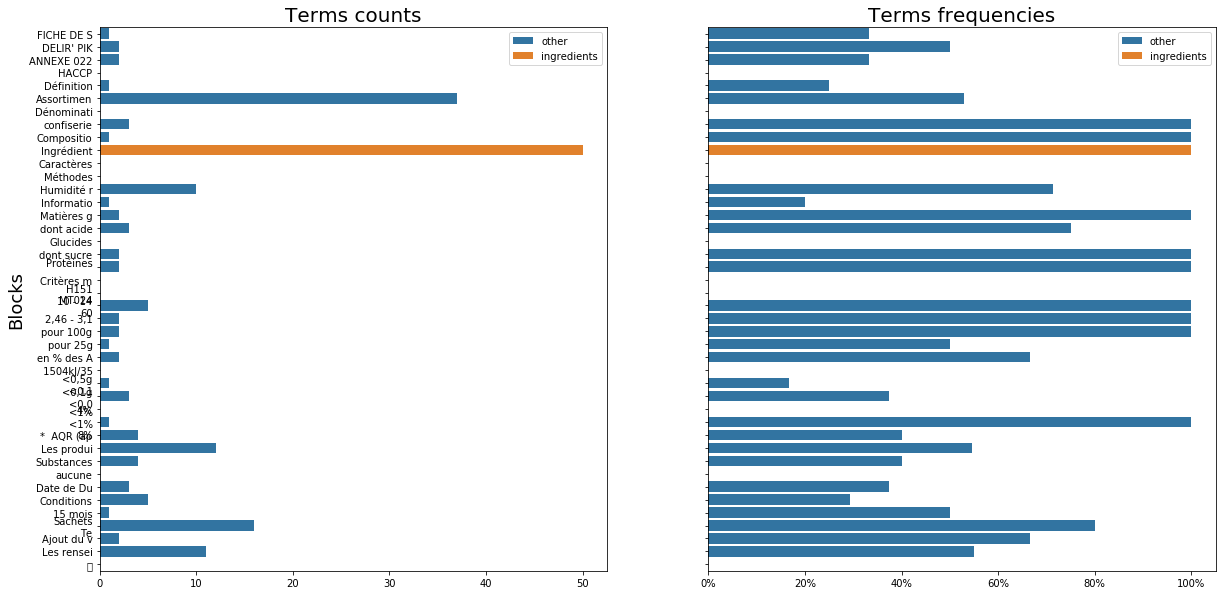

In [22]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

colors = ['other'] * len(test_doc_blocks)
colors[true_idx] = 'ingredients'

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), sharey=True)
sns.barplot(ax=ax[0], x=term_counts, y=[block[:10] for block in test_doc_blocks], hue=colors, dodge=False)
sns.barplot(ax=ax[1], x=term_freqs, y=[block[:10] for block in test_doc_blocks], hue=colors, dodge=False)
ax[0].set_title('Terms counts', fontsize=20)
ax[0].set_ylabel('Blocks', fontsize=18)
ax[1].set_title('Terms frequencies', fontsize=20)
ax[1].xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
pass

We can see that some very short texts also have an "ingredient word frequency" equal to 100%.

We can draw a scatter plot of these indicators:

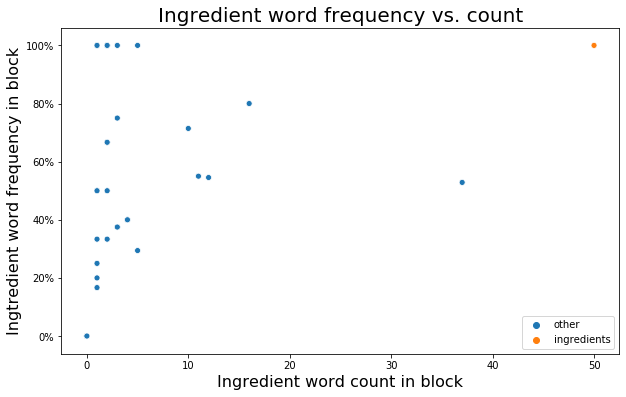

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
sns.scatterplot(ax=ax, x=term_counts, y=term_freqs, hue=colors)
ax.set_title('Ingredient word frequency vs. count', fontsize=20)
ax.set_xlabel('Ingredient word count in block', fontsize=16)
ax.set_ylabel('Ingtredient word frequency in block', fontsize=16)
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
pass

As expected, the correct ingredient list is in the top right quadrant of this representation. Should all cases yield results as sharply contrasted, we will have no difficulty in constructing an accurate functionality!

## 4.3 A difficulty arises in assessing ground truth for model validation

### Long strings are seldom strictly equal

We can compare the document ingredient list, with the one stored in the PIM system:

In [24]:
test_doc_blocks[true_idx].replace('\n', '') == df.loc[uid, "Ingrédients"]

False

Because a great deal of the current data in the PIM system has (at least once!) been manually keyed in, it is very likely that there will be an arguably high ratio of mistakes.

In [25]:
print('From pdf file: ')
print(test_doc_blocks[true_idx].replace('\n', ''))
print('--------------------------------------------------------------------------------------')
print('From PIM system:')
print(df.loc[uid, "Ingrédients"])

From pdf file: 
Ingrédients:  sirop de glucose; sucre; gélatine; dextrose; acidifiants: acide citrique, acide malique; agent d'enrobage: cire de carnauba; correcteurs d'acidité: citrate tricalcique, malate acide de sodium; arôme; concentrés de fruits et de plantes: citron, carthame, spiruline, patate douce, radis; sirop de sucre inverti; colorants: carmins, bleu patenté V, carotènes végétaux, lutéine, anthocyanes.
--------------------------------------------------------------------------------------
From PIM system:
Ingrédients: sirop de glucose, sucre, gélatine, dextrose, acidifiants: acide citrique, acide malique, agent d'enrobage: cire de carnauba, correcteurs d'acidité: citrate tricalcique, malate acide de sodium, arôme, concentrés de fruits et de plantes: citron, carthame, spiruline, patate douce, radis, sirop de sucre inverti, colorants: carmins, bleu patenté V, carotènes végétaux, lutéine, anthocyanes.


One can see that although very close, those 2 texts are somewhat different, from the punctuation marks.

### Different strategies can be undertaken to get around this difficulty

It is mandatory to compare the results of the model with the ground truth to assess the performance of the model. Some workarounds can be set up:

- Ignoring all products that do not have a strict matching block in their pdf file:
    - This will enable for a simple validation process
    - But it might dramatically decreasing the size of our dataset
    - as well as making 'short ingredient list' product overrepresented
    
    
- Defining a softer way to match texts between pdf files and PIM system data **with some text preprocessing** and filtering products that do not have a matching block
    - This will mitigate the previous drawbacks
    - But will increase complexity
    
    
- Defining a softer way to match texts between pdf files and PIM system data **by computing an edition distance** and filtering products that do not have a matching block
    - This will mitigate the previous drawbacks
    - But will increase complexity, as well as requiring to manually set up a distance threshold.
    - This could also lead to have separate pdf file blocks considered ground truth should the threshold distance be too high
    
- Considering blocks n-grams 
    - This might increase the number of 

- Manually labeling some pdf files
    - The most efficient
    - But the most time-consuming too!


# 5. Comparison between PIM system *ground truth* with documents content

We can try to find the products for which the PIM system ingredient list is strictly equal to one of the pdf file blocks.

## 5.1 Retrieving all the blocks from our corpus

The function below enables to retrieve all the blocks as a pandas Series.

In [ ]:
%%time
uid_list = list(requester._directory.index)
path_list = [os.path.join('.', 'dumps', 'prd', uid, 'FTF.pdf') for uid in uid_list]
path_series = pd.Series(path_list, index=uid_list)
blocks_series = PDFDecoder.threaded_paths_to_blocks(path_series)

In [ ]:
blocks_series.rename('pdf_blocks', inplace=True)
blocks_series.index.rename('uid', inplace=True)
blocks_series

As it takes some time to run the pdf parsing on all the corpus, we save it in a csv.

In [ ]:
import datetime
timestamp = datetime.datetime.now().strftime('%Y%m%d%H%M%S')
blocks_series.to_csv(os.path.join('.', 'dumps', 'prd', 'blocks_'+ timestamp + '.csv'), header=True)

## 5.2 Comparing blocks with PIM ingredient lists

We only keep products with ingredient list.

In [ ]:
df_ingred = df.loc[pd.notna(df['Ingrédients'])]
df_ingred

Among these products with an ingredient list, we only keep the ones which have (at least) a block from the pdf that is strictly matching its PIM ingredient list:

In [ ]:
joined_df = df_ingred.join(blocks_series)
matching = joined_df.loc[joined_df['Ingrédients'] == joined_df['pdf_blocks']].drop_duplicates()
matching

We can see that only keeping products with strict equality between PIM ingredient list and any of the pdf blocks has dramatically reduced their number: from 9549 to 299. New sample size only represents less than 3.5% of the initial set.

## 5.3 Making the same comparison but softening the criterion

TODO !!!

# 6. Manually labeling data

The most straightforward solution to have labeled data (but also the most time consuming...) is to label them manually!

## 6.1 Randomly selecting products to label

First step is to **randomly** select products from PIM, extract their attached documents and store them away safely. The criterion for these 500 products will be:

- they are food products: beverages or grocery
- they have a supplier technical datasheet attached

They will be stratified by product type (beverage or grocery).

In [32]:
requester.result[0].json()['entries'][0]

{'entity-type': 'document',
 'repository': 'default',
 'uid': 'e2128efe-08a3-4c93-a251-2f39eee7569b',
 'path': '/default-domain/pomSupplierWorkspace/CGMP/Set_de_table_extra_blanc_bord_festonne_en_colis_de_500_CGMP.1556352890062',
 'type': 'pomProduct',
 'state': 'product.waiting.supplier.validation',
 'parentRef': '0f182b14-e794-4a1a-af96-84d976ea9453',
 'isCheckedOut': False,
 'isVersion': False,
 'isProxy': False,
 'changeToken': '27-0',
 'isTrashed': False,
 'title': 'Set de table extra blanc bord festonné en colis de 500 CGMP',
 'lastModified': '2019-11-19T11:23:48.463Z',
 'properties': {'pprodc:withoutPalmOil': None,
  'pprodc:eggFarmingMode': None,
  'pprodc:milkAnimalOrigin': [],
  'pprodc:monoIngredient': False,
  'pprodc:activeIngredients': [],
  'pprodc:withoutCornStarch': None,
  'pprodc:withoutPhthalate': None,
  'pprodc:eggOrigin': [],
  'pprodc:withoutPolyphosphateAdded': None,
  'pprodc:withoutConservativeAgent': None,
  'pprodc:additives': [],
  'pprodc:withoutBisphenol

In [35]:
mapping = {'uid': 'uid',
           'designation': 'title',
           'state': 'state',
           'ingredients': 'properties.pprodc:ingredientsList',
           'type': 'properties.pprodtop:typeOfProduct'}
df = requester.file_report_from_result(mapping=mapping, index='uid') # , record_path='entries') 
df

,designation,state,ingredients,type,has_supplierdatasheet,has_supplierlabel
uid,,,,,,
e2128efe-08a3-4c93-a251-2f39eee7569b,Set de table extra blanc bord festonné en coli...,product.waiting.supplier.validation,None,hygiene,True,False
34d33a48-5735-49ec-a08f-6642933dec00,Préparation de concentré de citron et d'aneth ...,product.validate,Préparation aux jus de citron & aneth (condime...,grocery,False,False
d45d3058-f7d5-4cb8-be37-99bcc2ed06e9,Ecume de saveurs en bouteille 150 ml MISS ALGAE,product.validate,Préparation de jus de yuzu ( condiment de bals...,grocery,False,False
10f34e62-6a90-4cdc-9960-43df5c661719,"Vin de France Merlot rouge 12,5° en bouteille ...",product.validate,None,alcoholicDrink,False,False
34c638ab-2fc8-4eba-a0b6-410b1340ae1c,Vin de France Cinsault rosé 12° en bouteille 7...,product.validate,None,alcoholicDrink,True,False
...,...,...,...,...,...,...
ee2a60ff-581f-4c7b-968b-5e7983b3c5ff,HARICOTS VERTS EXTRA FINS 4/4 EPISAVEURS,product.correct,"haricots verts , eau, sel",grocery,True,True
272c9c44-39a3-4391-bc3b-d40aad9e1c25,FLAGEOLETS EXTRA FINS 5/1,product.waiting.supplier.validation,"flageolets verts, eau, sel",grocery,True,True
e493062f-5aa6-48be-9fc8-d7b37235c466,BOITE BURGER KRAFT 145X130X80,product.validate,None,hygiene,True,True


In [46]:
filtered_df = df.loc[(df.type.isin(['grocery', 'nonAlcoholicDrink']))
                     & (df.has_supplierdatasheet)]

In [56]:
train, ground_truth_df = train_test_split(filtered_df, test_size=500, random_state=42, stratify=filtered_df.type)
ground_truth_df

,designation,state,ingredients,type,has_supplierdatasheet,has_supplierlabel
uid,,,,,,
a0492df6-9c76-4303-8813-65ec5ccbfa70,Concentré liquide Asian en bouteille 980 ml CHEF,product.waiting.supplier.validation,"Eau, maltodextrine, sel, arômes, sucre, arôme ...",grocery,True,True
d183e914-db2f-4e2f-863a-a3b2d054c0b8,Pain burger curry 80 g CREATIV BURGER,product.waiting.supplier.validation,"Farine de BLE T65, eau, levure, huile de colz...",grocery,True,True
ab48a1ed-7a3d-4686-bb6d-ab4f367cada8,Macaroni en sachet 500 g PANZANI,product.waiting.supplier.validation,100% Semoule de BLE dur de qualité supérieure,grocery,True,False
528d4be3-425c-4f8b-8a87-12f1bc645ddd,Fève de Tonka en sachet 100 g COMPTOIR COLONIAL,product.validate,"Fève de tonka, taux de coumarine compris entre...",grocery,True,True
51b38427-b2ea-4c56-93e8-4242361ef31b,Caviar d'aubergine en pot 500 g PUGET RESTAURA...,product.validate,"Aubergine 60,5% (aubergine, huile de tournesol...",grocery,True,False
...,...,...,...,...,...,...
7c709a5e-b913-4a02-9396-a6469b09482a,Mini-bonbons aux fruits en sachet 1 kg SKENDY,product.validate,"Sirop de glucose, sucre, arômes naturels, acid...",grocery,True,True
c5dee4ab-9f57-4533-9f89-e216ee110f68,"FARINE DE BLÉ TYPE 45, 25KG",product.correct,farine de BLE T45,grocery,True,True
e67341d8-350f-46f4-9154-4dbbb8035621,PRÉPARATION POUR CRÈME BRÛLÉE BIO 6L,product.validate,"Sucre roux de canne*°(64%), amidon de maïs*, p...",grocery,True,True


Now that we have our products, we save their attached documents on disk.

In [58]:
requester.fetch_list_from_PIM(ground_truth_df.index, batch_size=20)

Done


In [60]:
requester.dump_data_from_result(update_directory=False, root_path=os.path.join('.', 'ground_truth'))
requester.dump_files_from_result(update_directory=False, root_path=os.path.join('.', 'ground_truth'))

Done
Launching 25 threads.
Thread complete!
Thread complete!
Thread complete!
Thread complete!
Thread complete!
Thread complete!
Thread complete!
Thread complete!
Thread complete!
Thread complete!
Thread complete!
Thread complete!
Thread complete!
Thread complete!
Thread complete!
Thread complete!
Thread complete!
Thread complete!
Thread complete!
Thread complete!
Thread complete!
Thread complete!
Thread complete!
Thread complete!
Thread complete!
Done


In [64]:
ground_truth_df['designation'].to_csv(os.path.join('.', 'ground_truth', 'uid.csv'), header=True, encoding='utf-8-sig')

We then try to reimport the ground truth after having processed some files, just to check that everything went ok.

In [4]:
import pandas as pd
import os

In [5]:
pd.read_csv(os.path.join('.', 'ground_truth', 'manually_labelled_ground_truth.csv'), sep=';', encoding='latin-1')

,uid,designation,ingredients
0,a0492df6-9c76-4303-8813-65ec5ccbfa70,Concentré liquide Asian en bouteille 980 ml CHEF,"Eau, maltodextrine, sel, arômes, sucre, arôme ..."
1,d183e914-db2f-4e2f-863a-a3b2d054c0b8,Pain burger curry 80 g CREATIV BURGER,"Farine de blé T65, eau, levure, vinaigre de ci..."
2,ab48a1ed-7a3d-4686-bb6d-ab4f367cada8,Macaroni en sachet 500 g PANZANI,- 100% Semoule de BLE dur de qualité supérieur...
3,528d4be3-425c-4f8b-8a87-12f1bc645ddd,Fève de Tonka en sachet 100 g COMPTOIR COLONIAL,fève de tonka (graines ridées de 25 à 50mm de ...
4,51b38427-b2ea-4c56-93e8-4242361ef31b,Caviar d'aubergine en pot 500 g PUGET RESTAURA...,"Aubergine 60,5% (aubergine, huile de tournesol..."
...,...,...,...
495,7c709a5e-b913-4a02-9396-a6469b09482a,Mini-bonbons aux fruits en sachet 1 kg SKENDY,NaN
496,c5dee4ab-9f57-4533-9f89-e216ee110f68,"FARINE DE BLÉ TYPE 45, 25KG",NaN
497,e67341d8-350f-46f4-9154-4dbbb8035621,PRÉPARATION POUR CRÈME BRÛLÉE BIO 6L,NaN
498,a8f6f672-20ac-4ff8-a8f2-3bc4306c8df3,Céréales instantanées en poudre saveur caramel...,NaN


In [17]:
uid = '70500268-802d-4211-93ba-9edbf6e0e7a3'
print(pd.read_csv(os.path.join('.', 'ground_truth', 'manually_labelled_ground_truth.csv'), sep=';', encoding='latin-1').set_index('uid', drop=True).loc[uid, 'ingredients'])

TAGADA
Ingrédients: sucre; sirop de glucose; gélatine; acidifiant: acide citrique; arôme; colorants: curcumine, carmins, carotènes végétaux.
DRAGIBUS SO
Ingrédients: sirop de glucose; sucre; amidon; dextrose; acidifiants: acide citrique, acide malique; correcteurs d'acidité: citrate monosodique, malate acide de sodium; arôme; colorants: curcumine, bleu patenté V, charbon végétal, carotènes végétaux, anthocyanes; agent d'enrobage: cire de carnauba.
HAPPY COLA
Ingrédients: sirop de glucose; sucre; gélatine; dextrose; acidifiant: acide citrique; sirop de caramel; arôme; agents d'enrobage: cire d'abeille blanche et jaune, cire de carnauba.
MAO CROQUI
Ingrédients: sucre; sirop de glucose; graisse de palme; humectant: sirop de sorbitol; acidifiant: acide citrique; gélatine; arôme; concentrés de fruits et de plantes: citron, carthame, spiruline, cassis, carotte, radis, pomme; correcteur d'acidité: carbonate acide de sodium; agent d'enrobage: cire d'abeille blanche et jaune; antiagglomérant: t

## Different strategies

TODO !!!

But The similarity between the ground truth (the pdf file) and the content of the PIM system can be measured via the [Levenshtein distance](https://en.wikipedia.org/wiki/Levenshtein_distance). This distance is the number of character insertions, deletions or substitutions to get from one text to the other.

If we compute this distance between the pdf file block and the PIM system content we get:

In [26]:
import jellyfish
dist = jellyfish.levenshtein_distance(test_doc_blocks[true_idx].replace('\n', ''),
                                      df.loc[uid, "Ingrédients"])
print(f'Levenshtein distance between pdf file and PIM system content is: {dist}')

Levenshtein distance between pdf file and PIM system content is: 11


We can compute this distance for each block in our pdf file, and plot it in a bar graph:

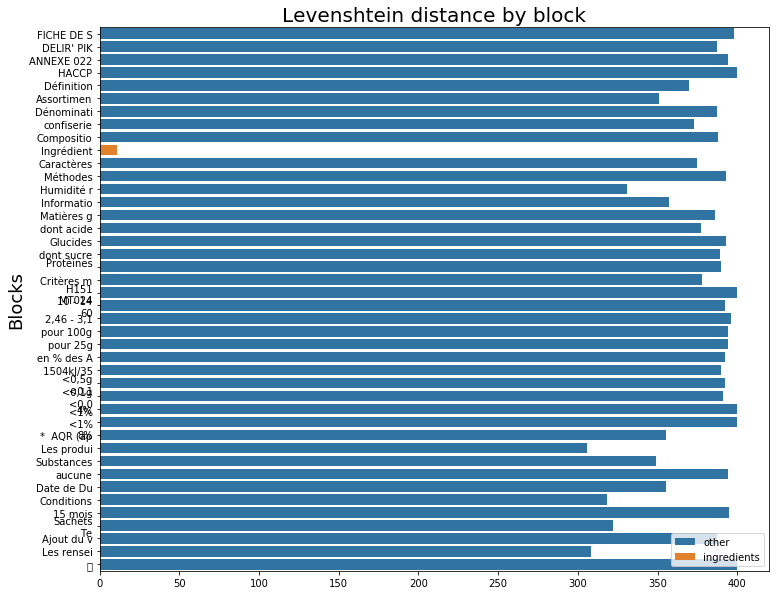

In [27]:
distances = list(map(lambda x:jellyfish.levenshtein_distance(x.replace('\n', ''), df.loc[uid, "Ingrédients"]),
                 test_doc_blocks))
fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(ax=ax, x=distances, y=[block[:10] for block in test_doc_blocks], hue=colors, dodge=False)
ax.set_title('Levenshtein distance by block', fontsize=20)
ax.set_ylabel('Blocks', fontsize=18)
pass

## 4.2 Making prediction on a document